# Train

## Importing Modules & Data

In [1]:
# To Mount Google Drive When Using Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import clear_output
import pickle

In [3]:
# Reading Training Data
# dataTrain = pd.read_csv('drive/My Drive/train.csv')#,index_col='CUSTOMER_ID')
dataTrain = pd.read_csv('train.csv')#,index_col='CUSTOMER_ID')

/home/greenalien24/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,19,21,23,26,28,29,30,32,82,83,85,91,269,325,326,327,328) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## EDA & Data Preprocessing

In [4]:
pd.set_option('display.max_columns',None)
dataTrain.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,OCCUP_ALL_NEW,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,BL_TAG,TWL_TAG,PL_TAG,AL_CNC_TAG,AGRI_TAG,CE_TAG,CV_TAG,EDU_TAG,TL_TAG,OTHER_LOANS_TAG,LAP_TAG,LAS_TAG,EEG_TAG,BBG_TAG,HL_TAG,GL_TAG,AL_CLOSED,PL_CLOSED,BL_CLOSED,TWL_CLOSED,CV_CLOSED,LAP_CLOSED,LAS_CLOSED,EEG_CLOSED,BBG_CLOSED,GL_CLOSED,CC_HOLD_MON_03,CC_HOLD_MON_02,CC_HOLD_MON_01,CC_ACTIVE_MON_03,CC_ACTIVE_MON_02,CC_ACTIVE_MON_01,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE_MON_03,DC_ACTIVE_MON_02,DC_ACTIVE_MON_01,DC_ACTIVE,DC_SPEND_MON_03,DC_SPEND_MON_02,DC_SPEND_MON_01,CC_SPEND_MON_04,CC_SPEND_MON_01,CC_SPEND_MON_02,CC_SPEND_MON_03,DC_SPEND_MON_04,PM_FD_MON_01,PM_FD_MON_02,PM_FD_MON_04,CR_LIMIT,STMT_MON_03,STMT_MON_02,STMT_MON_01,COC_ELIGIBLE,LAP_SCRUB_LIVE,LAS_SCRUB_LIVE,PL_SCRUB_LIVE,GL_SCRUB_LIVE,TWL_SCRUB_LIVE,BL_SCRUB_LIVE,CEL_SCRUB_LIVE,TL_SCRUB_LIVE,AL_SCRUB_LIVE,LAP_SCRUB_CLOSED,LAS_SCRUB_CLOSED,PL_SCRUB_CLOSED,GL_SCRUB_CLOSED,TWL_SCRUB_CLOSED,BL_SCRUB_CLOSED,CEL_SCRUB_CLOSED,TL_SCRUB_CLOSED,AL_SCRUB_CLOSED,MATURITY_GL,MATURITY_LAP,MATURITY_LAS,STMT_CON_DAE_ACTIVE_MON_01,BTE_ACTIVE_MON_01,COC_ACTIVE_MON_01,PL2CC_ACTIVE_MON_01,MER_EMI_ACTIVE_MON_01,TRN_CON_DAE_ACTIVE_MON_01,STMT_CON_DAE_CLOSED_MON_01,BTE_CLOSED_MON_01,COC_CLOSED_MON_01,PL2CC_CLOSED_MON_01,MER_EMI_CLOSED_MON_01,TRN_CON_DAE_CLOSED_MON_01,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,NB_MON_01_CNT,NB_MON_02_CNT,NB_MON_03_CNT,CDMAT_MON_01,CDMAT_MON_04,MF_MON_04,MF_MON_01,RD_MON_04,RD_MON_01,FD_MON_04,FD_MON_01,LI_MON_04,LI_MON_01,GI_MON_04,GI_MON_01,CC_TXN_MON_01,CC_SPEND_MON_06,CC_TXN_MON_06,CC_TXN_MON_03,CC_TXN_MON_02,CC_TXN_MON_04,CC_SPEND_MON_05,CC_TXN_MON_05,DC_TXN_MON_04,DC_TXN_MON_01,DC_SPEND_MON_06,DC_TXN_MON_06,DC_SPEND_MON_05,DC_TXN_MON_05,DC_TXN_MON_03,DC_TXN_MON_02,DC_SPEND_MON_04_ENT,DC_SPEND_MON_04_MED,DC_SPEND_MON_04_GRC,DC_SPEND_MON_04_HMD,DC_SPEND_MON_04_HBY,DC_SPEND_MON_04_CARE,DC_SPEND_MON_04_TRL,DC_SPEND_MON_04_RST,DC_SPEND_MON_04_JER,DC_SPEND_MON_04_HTL,DC_SPEND_MON_04_ATM,DC_SPEND_MON_03_ENT,DC_SPEND_MON_03_MED,DC_SPEND_MON_03_HMD,DC_SPEND_MON_03_HBY,DC_SPEND_MON_03_CARE,DC_SPEND_MON_03_TRL,DC_SPEND_MON_03_RST,DC_SPEND_MON_03_JER,DC_SPEND_MON_03_HTL,DC_SPEND_MON_03_ATM,DC_SPEND_MON_02_ENT,DC_SPEND_MON_02_MED,DC_SPEND_MON_02_HMD,DC_SPEND_MON_02_HBY,DC_SPEND_MON_02_CARE,DC_SPEND_MON_02_TRL,DC_SPEND_MON_02_RST,DC_SPEND_MON_02_JER,DC_SPEND_MON_02_HTL,DC_SPEND_MON_02_ATM,DC_SPEND_MON_01_ENT,DC_SPEND_MON_01_MED,DC_SPEND_MON_01_HMD,DC_SPEND_MON_01_HBY,DC_SPEND_MON_01_CARE,DC_SPEND_MON_01_TRL,DC_SPEND_MON_01_RST,DC_SPEND_MON_01_JER,DC_SPEND_MON_01_HTL,DC_SPEND_MON_01_ATM,DC_SPEND_MON_05_ENT,DC_SPEND_MON_05_MED,DC_SPEND_MON_05_HMD,DC_SPEND_MON_05_HBY,DC_SPEND_MON_05_CARE,DC_SPEND_MON_05_TRL,DC_SPEND_MON_05_RST,DC_SPEND_MON_05_JER,DC_SPEND_MON_05_HTL,DC_SPEND_MON_05_ATM,CC_SPEND_MON_04_ENT,CC_SPEND_MON_04_MED,CC_SPEND_MON_04_HMD,CC_SPEND_MON_04_HBY,CC_SPEND_MON_04_CARE,CC_SPEND_MON_04_TRL,CC_SPEND_MON_04_RST,CC_SPEND_MON_04_JER,CC_SPEND_MON_04_HTL,CC_SPEND_MON_04_ATM,CC_SPEND_MON_02_ENT,CC_SPEND_MON_02_MED,CC_SPEND_MON_02_HMD,CC_SPEND_MON_02_HBY,CC_SPEND_MON_02_CARE,CC_SPEND_MON_02_TRL,CC_SPEND_MON_02_RST,CC_SPEND_MON_02_JER,CC_SPEND_MON_02_HTL,CC_SPEND_MON_02_ATM,CC_SPEND_MON_01_ENT,CC_SPEND_MON_01_MED,CC_SPEND_MON_01_HMD,CC_SPEND_MON_01_HBY,CC_SPEND_MON_01_CARE,CC_SPEND_MON_01_TRL,CC_SPEND_MON_01_RST,CC_SPEND_MON_01_JER,CC_SPEND_MON_01_HTL,CC_SPEND_MON_01_ATM,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,D_AMT_L3_MON_06,C_AMT_L3_MON_06,C_COUNT_L3_MON_06,D_COUNT_L3_MON_06,MAX_C_AMT_L3_MON_06,D_AMT_L3_MON_05,C_AMT_L3_MON_05,C_COUNT_L3_MON_05,D_COUNT_L3_MON_05,MAX_C_AMT_L3_MON_05,D_AMT_L3_MON_04,C_AMT_L3_MON_04,C_COUNT_L3_MON_04,D_COUNT_L3_MON_04,MAX_C_AMT_L3_MON_04,D_AMT_L3_MON_03,C_AMT_L3_MON_03,C_COUNT_L3_MON_03,D_COUNT_L3_MON_03,MAX_C_AMT_L3_MON_03,D_AMT_L3_MON_02,C_AMT_L3_MON_02,C_COUNT_L3_MON_02,D_COUNT_L3_MON_02,MAX_C_AMT_L3_

In [7]:
dataTrain.info(verbose=True,max_cols=333)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 333 columns):
CUSTOMER_ID                   300000 non-null int64
ACT_TYPE                      300000 non-null object
GENDER                        299913 non-null object
LEGAL_ENTITY                  300000 non-null object
OCCUP_ALL_NEW                 300000 non-null object
AGE                           300000 non-null int64
N_CASA_MAX_BALANCE_MTD        300000 non-null float64
N_CASA_MIN_BALANCE_MTD        300000 non-null float64
BL_TAG                        64 non-null object
TWL_TAG                       4897 non-null object
PL_TAG                        17802 non-null object
AL_CNC_TAG                    577 non-null object
AGRI_TAG                      18 non-null object
CE_TAG                        1 non-null object
CV_TAG                        18 non-null object
EDU_TAG                       45 non-null object
TL_TAG                        16 non-null object
OTHER_LOANS_TAG   

In [8]:
# Selecting Only Columns Having Atleast 75% NonNull Values
newData = dataTrain.dropna(axis=1,thresh=225000)

In [9]:
newData.info(verbose=True,max_cols=len(newData.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 49 columns):
CUSTOMER_ID                300000 non-null int64
ACT_TYPE                   300000 non-null object
GENDER                     299913 non-null object
LEGAL_ENTITY               300000 non-null object
OCCUP_ALL_NEW              300000 non-null object
AGE                        300000 non-null int64
N_CASA_MAX_BALANCE_MTD     300000 non-null float64
N_CASA_MIN_BALANCE_MTD     300000 non-null float64
CC_HOLD                    300000 non-null object
CC_ACTIVE                  300000 non-null object
DC_HOLD                    300000 non-null object
DC_ACTIVE                  300000 non-null object
COC_ELIGIBLE               300000 non-null int64
EOP_BAL_MON_01             300000 non-null float64
AMB_MON_04                 294378 non-null float64
AMB_MON_01                 300000 non-null float64
AMB_MON_02                 299008 non-null float64
AMB_MON_03                 297222 no

In [10]:
newData.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,OCCUP_ALL_NEW,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI,RESPONDERS
0,385793,CSA,M,INDIVIDUAL,SALARIED,21,0.00,0.00,N,N,Y,N,0,0.00,0.00,0.00,0.00,0.00,N,N,N,N,N,NONE,MISSING,Y,Y,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,400606.0,N,N,N,N,N,N,N,N,N,N,NONE,0.00,0.00,0.000000,N
1,286891,CSA,M,INDIVIDUAL,SALARIED,23,8243.77,7.77,N,N,Y,Y,0,11.77,1417.26,300.51,593.06,418.09,N,N,N,N,N,NONE,MISSING,Y,Y,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,600045.0,N,N,N,N,N,N,N,N,N,N,NONE,3016.77,3.02,0.000000,N
2,108751,CSA,M,INDIVIDUAL,SALARIED,41,26515.00,0.00,N,N,Y,N,0,26458.25,5354.65,6100.73,7955.82,11138.53,N,N,N,N,Y,NONE,MISSING,N,N,0,NO_NEFT_TXN,NOT_RELEVANT,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,122001,N,N,N,N,N,N,N,N,N,N,NONE,9999.00,14858.75,0.000000,N
3,278651,CSA,M,INDIVIDUAL,SALARIED,28,65917.28,8270.28,Y,Y,Y,Y,1,65917.28,113120.39,35560.81,42686.93,61593.38,Y,N,N,N,N,NONE,MISSING,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,311408.0,N,N,Y,N,N,Y,N,Y,Y,N,NONE,27163.10,49675.27,0.000000,N
4,23637,CSA,M,INDIVIDUAL,SALARIED,34,22260.94,6060.94,Y,Y,Y,N,0,6172.94,9099.94,15858.71,14008.08,4570.73,N,N,N,N,N,NONE,ENGINEER,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NOT_RELEVANT,122015,N,N,N,N,N,N,N,N,Y,N,NONE,21065.87,983.87,251.758794,N


### Analysis of Act type

In [11]:
newData['ACT_TYPE'].unique()

array(['CSA', 'SA'], dtype=object)

<BarContainer object of 2 artists>

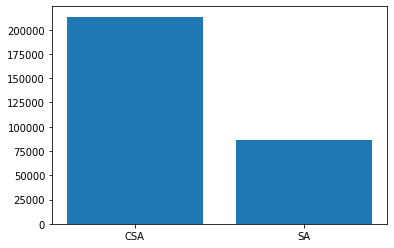

In [12]:
plt.bar(newData['ACT_TYPE'].unique(),newData.ACT_TYPE.value_counts())

<BarContainer object of 2 artists>

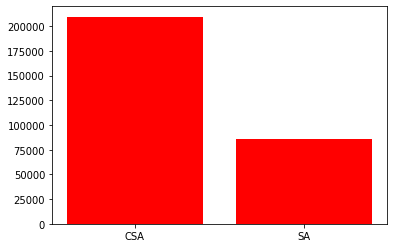

In [13]:
plt.bar(newData['ACT_TYPE'].unique(),newData.ACT_TYPE[newData.RESPONDERS == 'N'].value_counts(),color='r')

<BarContainer object of 2 artists>

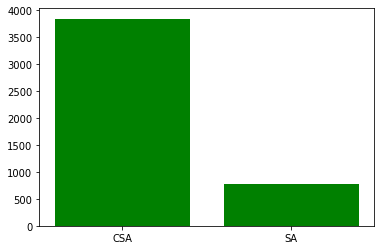

In [14]:
plt.bar(newData['ACT_TYPE'].unique(),newData.ACT_TYPE[newData.RESPONDERS == 'Y'].value_counts(),color='g')

In [15]:
leActType = LabelEncoder()

In [16]:
newData['ACT_TYPE'] = leActType.fit_transform(newData['ACT_TYPE'])

/home/greenalien24/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Analysis of Gender

In [17]:
newData['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [18]:
def genderFill(df):
    df['GENDER'].fillna(str(df['GENDER'].mode().values[0]),inplace=True)

In [19]:
genderFill(newData)

/home/greenalien24/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<BarContainer object of 2 artists>

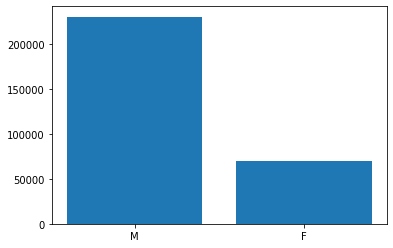

In [20]:
plt.bar(newData['GENDER'].unique(),newData.GENDER.value_counts())

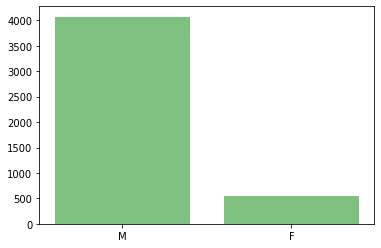

In [21]:
plt.bar(['M','F'],newData.GENDER[newData.RESPONDERS == 'Y'].value_counts(),color='g',alpha=0.5)
plt.show()

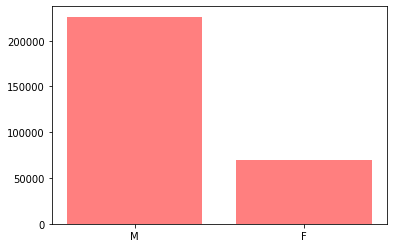

In [22]:
plt.bar(['M','F'],newData.GENDER[newData.RESPONDERS == 'N'].value_counts(),color='r',alpha=0.5)
plt.show()

In [23]:
leGen = LabelEncoder()

In [24]:
newData['GENDER'] = leGen.fit_transform(newData['GENDER'])

/home/greenalien24/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Analysis on AGE

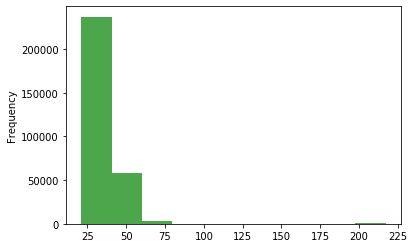

In [25]:
newData['AGE'].plot(kind='hist',alpha=0.7,color='g')

In [26]:
newData['AGE'][newData['AGE'] > 100].count()

1305

In [27]:
newData = newData[newData['AGE'] <= 100]

In [28]:
newData.shape

(298695, 49)

In [29]:
newData['AGE'].describe()

count    298695.000000
mean         33.355416
std           9.493298
min          21.000000
25%          26.000000
50%          31.000000
75%          38.000000
max          65.000000
Name: AGE, dtype: float64

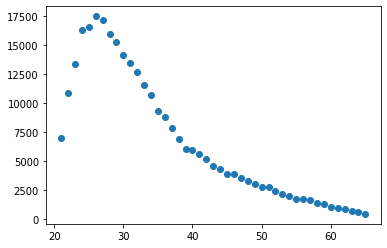

In [30]:
plt.scatter(newData['AGE'].value_counts().sort_index().index,newData['AGE'].value_counts().sort_index().values)

### Analysis on Legal Entity

In [31]:
newData['LEGAL_ENTITY'].unique()

array(['INDIVIDUAL', 'OTHERS', 'NON_GOVERNMENTAL_ORG', 'FIRM'],
      dtype=object)

In [32]:
leLe = LabelEncoder()

In [33]:
newData['LEGAL_ENTITY'] = leLe.fit_transform(newData['LEGAL_ENTITY'])

/home/greenalien24/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<BarContainer object of 4 artists>

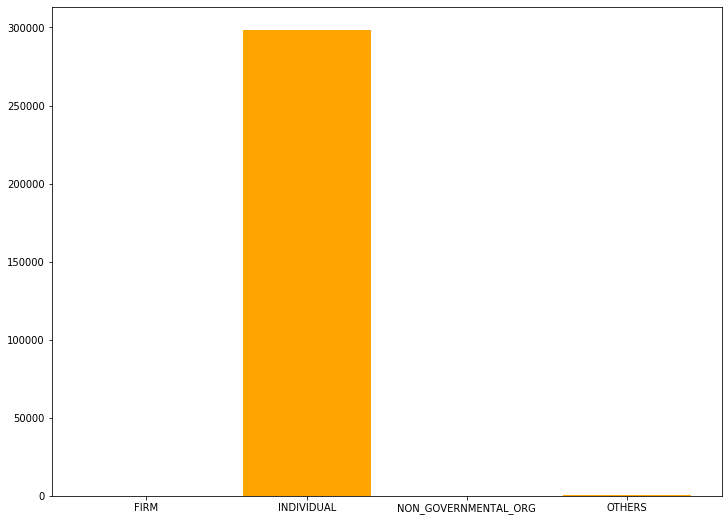

In [35]:
plt.figure(figsize=(12,9))
plt.bar(leLe.classes_,newData['LEGAL_ENTITY'].value_counts().sort_index().values,color='orange')

### Analysis on Occupation

In [36]:
newData['OCCUP_ALL_NEW'].unique()

array(['SALARIED'], dtype=object)

In [37]:
newData.drop('OCCUP_ALL_NEW',axis=1,inplace=True)

/home/greenalien24/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Analysis of Average Monthly Balance

In [38]:
newData[['AMB_MON_01','AMB_MON_02','AMB_MON_03','AMB_MON_04']].corr()

,AMB_MON_01,AMB_MON_02,AMB_MON_03,AMB_MON_04
AMB_MON_01,1.000000,0.844099,0.723092,0.648993
AMB_MON_02,0.844099,1.000000,0.863011,0.750984
AMB_MON_03,0.723092,0.863011,1.000000,0.868657
AMB_MON_04,0.648993,0.750984,0.868657,1.000000


In [39]:
def ambFill(df,listofcols):
    '''For fill na value in AMB_MON_0*(should be in asc order).'''
    for i in range(1,len(listofcols)):
        df[listofcols[i]][df[listofcols[i]].isnull()] = df[listofcols[i-1]][df[listofcols[i]].isnull()]

In [40]:
ambFill(newData,['AMB_MON_01','AMB_MON_02','AMB_MON_03','AMB_MON_04'])

/home/greenalien24/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/greenalien24/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/greenalien24/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [41]:
newData.isnull().any()[newData.isnull().any().values == True]

ZIP_CODE_FINAL    True
EOP_MON_02        True
EOP_MON_03        True
dtype: bool

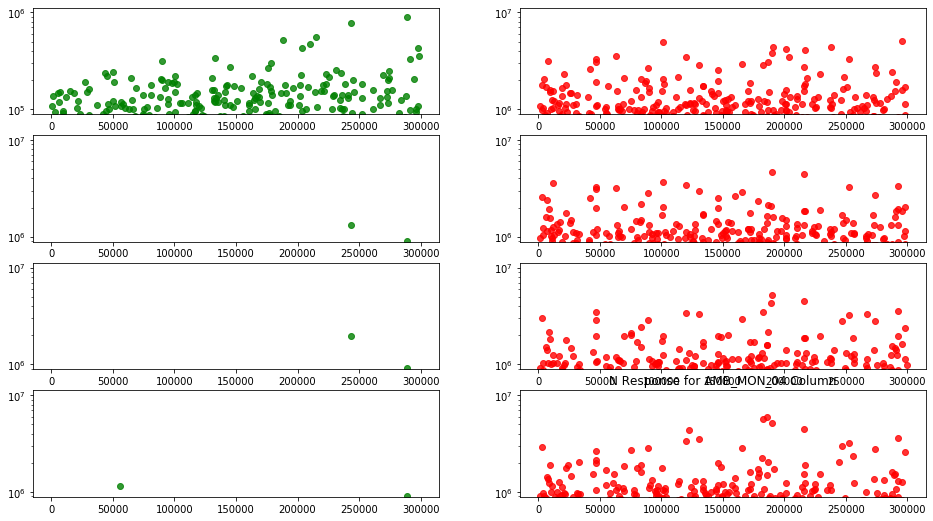

In [42]:
fig, axs = plt.subplots(4,2,figsize=(16,9))
y=0
x=0
for col in ['AMB_MON_01','AMB_MON_02','AMB_MON_03','AMB_MON_04']:
    y=0
    cl = 'g'
    if x == 4:
        break
    for res in ['Y','N']:
        plt.title('{} Response for {} Column'.format(res,col))
        axs[x,y].scatter(newData[col][newData.RESPONDERS == res].sort_index().index, newData[col][newData.RESPONDERS == res].sort_index().values,color = cl,alpha=0.8)
        axs[x,y].set_yscale('log')
        y += 1
        cl = 'r'
    x += 1
plt.show()

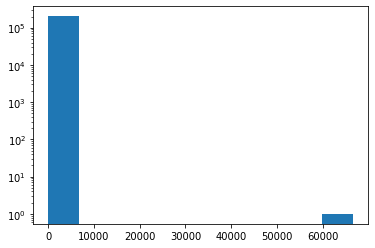

In [43]:
plt.hist(newData.AMB_MON_01.value_counts().sort_index())
plt.yscale('log')

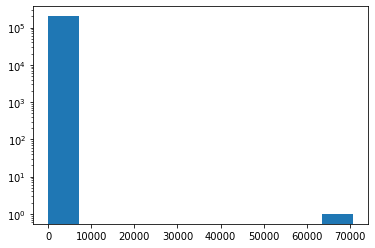

In [44]:
plt.hist(newData.AMB_MON_02.value_counts().sort_index())
plt.yscale('log')

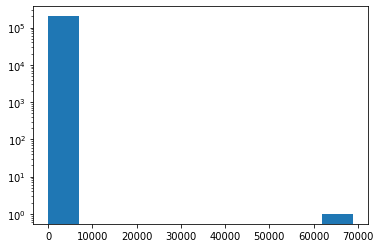

In [45]:
plt.hist(newData.AMB_MON_03.value_counts().sort_index())
plt.yscale('log')

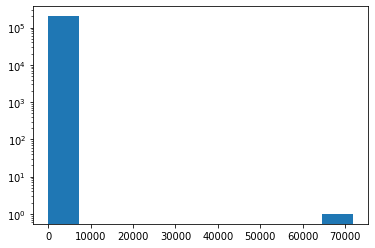

In [46]:
plt.hist(newData.AMB_MON_04.value_counts().sort_index())
plt.yscale('log')

### Analysis of Zipcode

In [47]:
newData['ZIP_CODE_FINAL'].dtype

dtype('O')

In [48]:
dicti = {'float':0,'int':0,'str':0}
for x in newData.ZIP_CODE_FINAL:
    if type(x) == str:
        dicti['str'] += 1
    elif type(x) == float:
        dicti['float'] += 1
    elif type(x) == int:
        dicti['int'] += 1
print(dicti)

{'float': 110423, 'int': 0, 'str': 188272}


In [49]:
newData.ZIP_CODE_FINAL.isnull().sum()

2140

In [50]:
newData = newData[newData.ZIP_CODE_FINAL.notnull()]

In [51]:
def cleaningZipCode(df):
    ind =[]
    count = len(df)
    countl = len(df)
    for index, value in enumerate(df.ZIP_CODE_FINAL):
        # print(index,value)
        try:
            if (len(str(value)) < 5):
                df.ZIP_CODE_FINAL.iloc[index] = 'EMPTY'
                # print('\'{}\' index will be chenged to \'{}\' value.\n'.format(index,df.ZIP_CODE_FINAL.iloc[index]))
            elif ' ' in str(value):
                df.ZIP_CODE_FINAL.iloc[index] = str(value).split(' ')[0] + str(value).split(' ')[1]
                # print("'{}' value for index '{}' was replaced with '{}'\n".format(value,index,df.ZIP_CODE_FINAL.iloc[index]))
            elif '.' in str(value):
                df.ZIP_CODE_FINAL.iloc[index] = str(value).split('.')[0]
                # print("'{}' value for index '{}' was replaced with '{}'\n".format(value,index,df.ZIP_CODE_FINAL.iloc[index]))
            else:
                df.ZIP_CODE_FINAL.iloc[index] = str(value)
        except ValueError:
            print('\'{}\' value is giving ValueError'.format(value))
            print('Record with index \'{}\' will be droped\n')
            ind.append(index)
        count -= 1
        print('{}%'.format((((abs(count-countl))/countl)*100)))
        clear_output()
    df.drop(index,inplace=True)

In [52]:
cleaningZipCode(newData)

In [56]:
lezc = LabelEncoder()

In [57]:
newData.ZIP_CODE_FINAL = lezc.fit_transform(newData.ZIP_CODE_FINAL)

### Analysis on EOP MON

In [58]:
EOP = ['EOP_MON_02','EOP_MON_03']
newData[EOP].describe()

,EOP_MON_02,EOP_MON_03
count,2.955660e+05,2.937910e+05
mean,2.170817e+04,2.177108e+04
std,6.829553e+04,6.652719e+04
min,-2.511007e+06,-2.511007e+06
25%,0.000000e+00,0.000000e+00
50%,1.520810e+03,1.650450e+03
75%,1.979134e+04,2.049374e+04
max,5.366019e+06,7.500850e+06


In [59]:
newData[EOP].head()

,EOP_MON_02,EOP_MON_03
0,0.00,0.00
1,3016.77,3.02
2,9999.00,14858.75
3,27163.10,49675.27
4,21065.87,983.87


In [60]:
newData[EOP].isnull().sum()

EOP_MON_02     988
EOP_MON_03    2763
dtype: int64

In [61]:
newData.EOP_MON_02.fillna(0,inplace=True)

In [62]:
newData.EOP_MON_03.fillna(0,inplace=True)

In [63]:
newData.isnull().any()[newData.isnull().any().values == True]

Series([], dtype: bool)

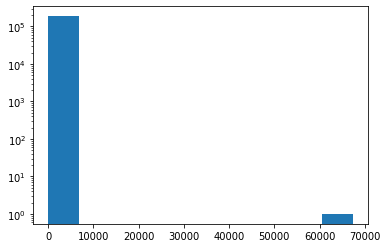

In [64]:
plt.hist(newData.EOP_BAL_MON_01.value_counts().sort_index())
plt.yscale('log')

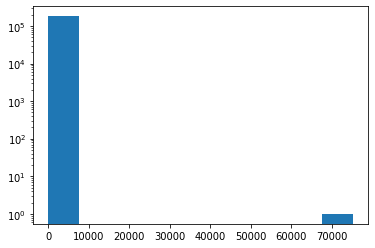

In [65]:
plt.hist(newData.EOP_MON_02.value_counts().sort_index())
plt.yscale('log')

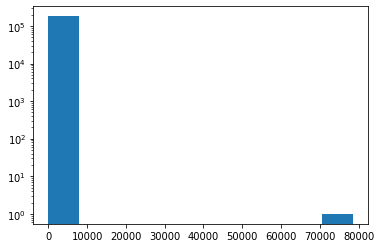

In [66]:
plt.hist(newData.EOP_MON_03.value_counts().sort_index())
plt.yscale('log')

### Analysis on Binary Data Columns

In [67]:
def listBinCols(df):
    bincols = []
    for col in df.columns:
        if df[col].nunique() == 2:
            if sorted(df[col].unique()) == ['N','Y']:
                bincols.append(col)
                # print('{} Column has {} unique values'.format(col,df[col].unique()))
    return bincols

In [68]:
binCols = listBinCols(newData)

In [69]:
leBin = LabelEncoder()

In [70]:
def leBincols(df):
    for col in binCols:
        df[col] = leBin.fit_transform(df[col])
    return leBin

In [71]:
leBin = leBincols(newData)

### Analysis on CHANNEL_CLICK_DISP

In [72]:
newData.CHANNEL_CLICK_DISP.nunique()

3

In [73]:
newData.CHANNEL_CLICK_DISP.unique()

array(['NONE', 'DISP', 'CLICK'], dtype=object)

<BarContainer object of 3 artists>

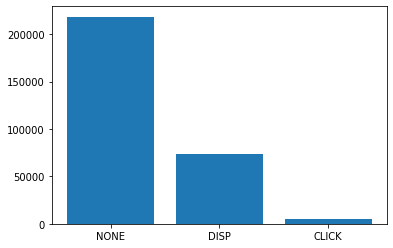

In [74]:
plt.bar(newData.CHANNEL_CLICK_DISP.unique(),newData.CHANNEL_CLICK_DISP.value_counts())

<BarContainer object of 3 artists>

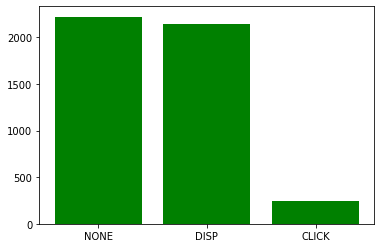

In [75]:
plt.bar(newData.CHANNEL_CLICK_DISP[newData.RESPONDERS == 1].unique(),newData.CHANNEL_CLICK_DISP[newData.RESPONDERS == 1].value_counts(),color='g')

<BarContainer object of 3 artists>

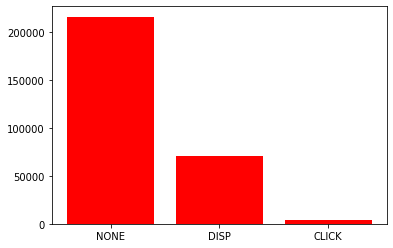

In [76]:
plt.bar(newData.CHANNEL_CLICK_DISP[newData.RESPONDERS == 0].unique(),newData.CHANNEL_CLICK_DISP[newData.RESPONDERS == 0].value_counts(),color='r')

In [77]:
leccd = LabelEncoder()

In [78]:
newData.CHANNEL_CLICK_DISP = leccd.fit_transform(newData.CHANNEL_CLICK_DISP)

### Analysis on Designation

In [79]:
newData.DESIGNATION_FINAL.nunique()

11

In [80]:
newData.DESIGNATION_FINAL.unique()

array(['MISSING', 'ENGINEER', 'MANAGER', 'EXECUTIVE', 'SUP/TECH/OPR',
       'OFFICER', 'OTHERS', 'DEVEP/PROG/ANALYST/ASSO', 'REMAING',
       'TOP_MANAG/DOC', 'TEACH/PROF/CONSULT'], dtype=object)

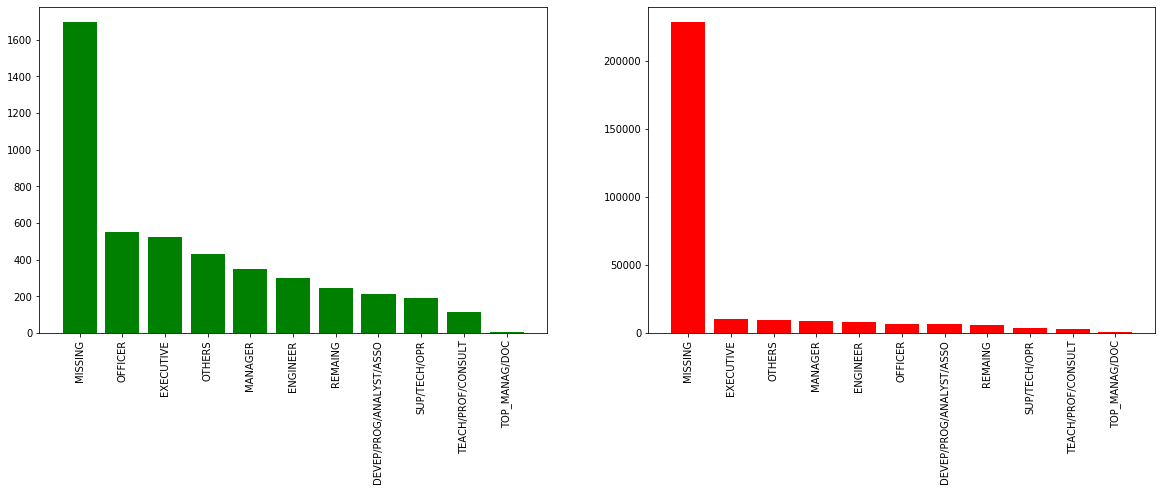

In [81]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].bar(newData.DESIGNATION_FINAL[newData.RESPONDERS == 1].value_counts().index, newData.DESIGNATION_FINAL[newData.RESPONDERS == 1].value_counts().values,color='g')
ax[1].bar(newData.DESIGNATION_FINAL[newData.RESPONDERS == 0].value_counts().index, newData.DESIGNATION_FINAL[newData.RESPONDERS == 0].value_counts().values,color='r')
for i in range(2):
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(90)

In [82]:
ledes = LabelEncoder()

In [83]:
newData.DESIGNATION_FINAL = ledes.fit_transform(newData.DESIGNATION_FINAL)

### Analysis on CC DC Catogories

In [84]:
ccdc = ['NEFT_CC_CATEGORY', 'NEFT_DC_CATEGORY', 'TPT_DC_CATEGORY_MON_01',
       'TPT_CC_CATEGORY_MON_01', 'IMPS_CC_CATEGORY_MON_01']

In [85]:
def ccdcUnique(df):
    for col in ccdc:
        print('{} has {} unique values: \n{}\n\n'.format(col, df[col].nunique(), df[col].unique()))

In [86]:
ccdcUnique(newData)

NEFT_CC_CATEGORY has 20 unique values: 
['NO_NEFT_TXN' 'NOT_RELEVANT' 'LOAN' 'RETURN' 'TRANSFER' 'RENT' 'TRAVEL'
 'EDUCATION' 'EMI' 'PERSONAL' 'MEDICAL' 'BUILDER' 'JEWELLERY' 'ELECTRICI'
 'GAS' 'WEDDING' 'OPERATION' 'ADVANCE' 'CHILD_BIR' 'HELP']


NEFT_DC_CATEGORY has 20 unique values: 
['NO_NEFT_TXN' 'NOT_RELEVANT' 'LOAN' 'RENT' 'JEWELLERY' 'EDUCATION'
 'MEDICAL' 'TRAVEL' 'PERSONAL' 'CC_PAYMENT' 'BUILDER' 'GAS' 'EMI'
 'CHILD_BIR' 'TRANSFER' 'HELP' 'WEDDING' 'ELECTRICI' 'OPERATION' 'RETURN']


TPT_DC_CATEGORY_MON_01 has 21 unique values: 
['NO_TPT_TXN' 'NOT_RELEVANT' 'MEDICAL' 'LOAN' 'TRANSFER' 'TRAVEL'
 'PERSONAL' 'RENT' 'CC_PAYMENT' 'RETURN' 'EMI' 'EDUCATION' 'BUILDER'
 'CHILD_BIR' 'HELP' 'ADVANCE' 'WEDDING' 'GAS' 'ELECTRICI' 'OPERATION'
 'JEWELLERY']


TPT_CC_CATEGORY_MON_01 has 21 unique values: 
['NO_TPT_TXN' 'NOT_RELEVANT' 'TRANSFER' 'LOAN' 'PERSONAL' 'RETURN' 'RENT'
 'TRAVEL' 'CC_PAYMENT' 'EMI' 'CHILD_BIR' 'EDUCATION' 'GAS' 'ADVANCE'
 'MEDICAL' 'HELP' 'ELECTRICI' 'WEDDING' 'BUIL

In [87]:
def leCCDC(df,lst):
    le1 = LabelEncoder()
    le2 = LabelEncoder()
    le3 = LabelEncoder()
    le4 = LabelEncoder()
    le5 = LabelEncoder()
    le = [le1,le2,le3,le4,le5]
    zipped = list(zip(le,lst))
    for i in range(len(zipped)):
        print(zipped[i][1])
        df[zipped[i][1]] = zipped[i][0].fit_transform(df[zipped[i][1]])
    return le

In [88]:
[le1,le2,le3,le4,le5] = leCCDC(newData,ccdc)

NEFT_CC_CATEGORY
NEFT_DC_CATEGORY
TPT_DC_CATEGORY_MON_01
TPT_CC_CATEGORY_MON_01
IMPS_CC_CATEGORY_MON_01


In [89]:
newData.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI,RESPONDERS
0,385793,0,1,1,21,0.00,0.00,0,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,5802,0,0,0,0,0,0,0,0,0,0,NONE,0.00,0.00,0.000000,0
1,286891,0,1,1,23,8243.77,7.77,0,0,1,1,0,11.77,1417.26,300.51,593.06,418.09,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,11193,0,0,0,0,0,0,0,0,0,0,NONE,3016.77,3.02,0.000000,0
2,108751,0,1,1,41,26515.00,0.00,0,0,1,0,0,26458.25,5354.65,6100.73,7955.82,11138.53,0,0,0,0,1,2,4,0,0,0,12,11,13,13,13,154,0,0,0,0,0,0,0,0,0,0,NONE,9999.00,14858.75,0.000000,0
3,278651,0,1,1,28,65917.28,8270.28,1,1,1,1,1,65917.28,113120.39,35560.81,42686.93,61593.38,1,0,0,0,0,2,4,0,0,0,12,12,13,13,13,4035,0,0,1,0,0,1,0,1,1,0,NONE,27163.10,49675.27,0.000000,0
4,23637,0,1,1,34,22260.94,6060.94,1,1,1,0,0,6172.94,9099.94,15858.71,14008.08,4570.73,0,0,0,0,0,2,1,0,0,0,12,12,13,13,12,167,0,0,0,0,0,0,0,0,1,0,NONE,21065.87,983.87,251.758794,0


### Analysis on TOP_CORP_TAG

In [90]:
newData.TOP_CORP_TAG.nunique()

3

In [91]:
newData.TOP_CORP_TAG.unique()

array(['NONE', 'TOP_100', 'TOP_800'], dtype=object)

<BarContainer object of 3 artists>

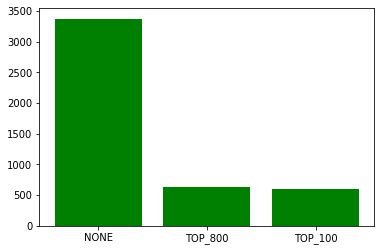

In [92]:
plt.bar(newData.TOP_CORP_TAG[newData.RESPONDERS == 1].value_counts().index, newData.TOP_CORP_TAG[newData.RESPONDERS == 1].value_counts().values, color = 'g')

<BarContainer object of 3 artists>

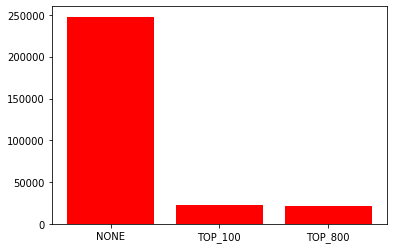

In [93]:
plt.bar(newData.TOP_CORP_TAG[newData.RESPONDERS == 0].value_counts().index, newData.TOP_CORP_TAG[newData.RESPONDERS == 0].value_counts().values, color = 'r')

In [94]:
letct = LabelEncoder()

In [95]:
newData.TOP_CORP_TAG = letct.fit_transform(newData.TOP_CORP_TAG)

### Analysis on N_CASA_MAX_BALANCE_MTD

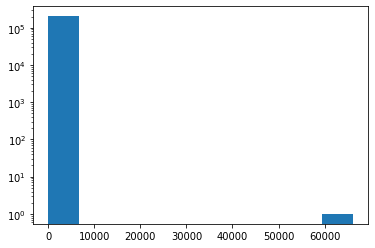

In [96]:
plt.hist(newData.N_CASA_MAX_BALANCE_MTD.value_counts().sort_index())
plt.yscale('log')

### Analysis on N_CASA_MIN_BALANCE_MTD

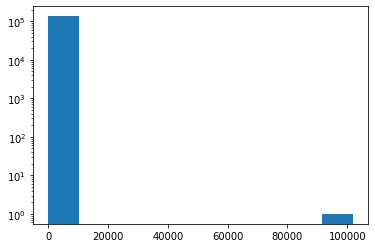

In [97]:
plt.hist(newData.N_CASA_MIN_BALANCE_MTD.value_counts().sort_index())
plt.yscale('log')

### Analysis on SCRUB EMI

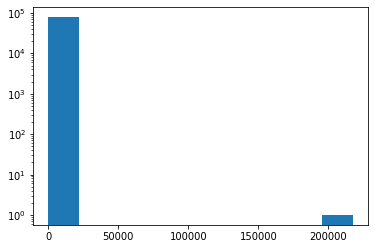

In [98]:
plt.hist(newData.SCRUB_EMI.value_counts().sort_index())
plt.yscale('log')

## Preprocessing

In [99]:
newData.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI,RESPONDERS
0,385793,0,1,1,21,0.00,0.00,0,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,5802,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.000000,0
1,286891,0,1,1,23,8243.77,7.77,0,0,1,1,0,11.77,1417.26,300.51,593.06,418.09,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,11193,0,0,0,0,0,0,0,0,0,0,0,3016.77,3.02,0.000000,0
2,108751,0,1,1,41,26515.00,0.00,0,0,1,0,0,26458.25,5354.65,6100.73,7955.82,11138.53,0,0,0,0,1,2,4,0,0,0,12,11,13,13,13,154,0,0,0,0,0,0,0,0,0,0,0,9999.00,14858.75,0.000000,0
3,278651,0,1,1,28,65917.28,8270.28,1,1,1,1,1,65917.28,113120.39,35560.81,42686.93,61593.38,1,0,0,0,0,2,4,0,0,0,12,12,13,13,13,4035,0,0,1,0,0,1,0,1,1,0,0,27163.10,49675.27,0.000000,0
4,23637,0,1,1,34,22260.94,6060.94,1,1,1,0,0,6172.94,9099.94,15858.71,14008.08,4570.73,0,0,0,0,0,2,1,0,0,0,12,12,13,13,12,167,0,0,0,0,0,0,0,0,1,0,0,21065.87,983.87,251.758794,0


In [100]:
newData.reset_index(drop=True, inplace=True)

In [101]:
selectedCols = newData.columns

In [105]:
savelst = [newData,letct,[le1,le2,le3,le4,le5],ledes,leccd,leBin,lezc,leLe,leGen,leActType]

In [110]:
def saveVarFData(varData,fn):
    with open(fn,'wb') as file:
        pickle.dump(varData,file)

In [111]:
saveVarFData(savelst,'savedata.pkl')

In [114]:
def loadVarFData(varData,fn):
    with open(fn,'wb') as file:
        savelst = pickle.load(file)
    return savelst

In [115]:
# loadVarFData('savedata.pkl')

In [116]:
newDataScaled = newData.copy()

In [133]:
def scaleCols(df,cols):
    mms = MinMaxScaler()
    for col in cols:
        df[col] = mms.fit_transform(df[col])

In [134]:
# scaleCols(newDataScaled,['N_CASA_MAX_BALANCE_MTD','N_CASA_MIN_BALANCE_MTD','EOP_BAL_MON_01','AMB_MON_04','AMB_MON_03','AMB_MON_02','AMB_MON_01','EOP_MON_02','EOP_MON_03','SCRUB_EMI'])

In [135]:
X = newData.iloc[:,1:-1].values
# Xs = newDataScaled.iloc[:,1:-1].values

In [136]:
y =  newData.iloc[:,-1].values
# ys =  newDataScaled.iloc[:,-1].values

## Modeling

In [137]:
skf = StratifiedKFold(n_splits=3)

In [148]:
def applyModel(clf):
    for trainIndex,testIndex in skf.split(X,y):
        clf.fit(X[trainIndex],y[trainIndex])
        pred = clf.predict(X[testIndex])
        print('Accuracy for Data is {}\n'.format(accuracy_score(y[testIndex],pred)))
        print('Classification report:\n{}'.format(classification_report(y[testIndex],pred)))
        print('Confusion Matrix:\n{}'.format(confusion_matrix(y[testIndex],pred)))
    return clf

In [146]:
def applyModelScaled(clf):
    for trainIndex,testIndex in skf.split(Xs,ys):
        clf.fit(Xs[trainIndex],ys[trainIndex])
        pred = clf.predict(xs[testIndex])
        print('Accuracy for Scaled Data is {}\n'.format(accuracy_score(ys[testIndex],pred)))
        print('Classification report:\n{}'.format(classification_report(y[testIndex],pred)))
        print('Confusion Matrix:\n{}'.format(confusion_matrix(y[testIndex],pred)))
    return clf

### Logistic Regression

In [144]:
logreg = LogisticRegression()

In [149]:
logres = applyModel(logreg)

/home/greenalien24/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for Data is 0.9844009225913487

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97316
           1       0.00      0.00      0.00      1536

    accuracy                           0.98     98852
   macro avg       0.49      0.50      0.50     98852
weighted avg       0.97      0.98      0.98     98852

Confusion Matrix:
[[97310     6]
 [ 1536     0]]


/home/greenalien24/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for Data is 0.9844311134940466

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97316
           1       0.00      0.00      0.00      1535

    accuracy                           0.98     98851
   macro avg       0.49      0.50      0.50     98851
weighted avg       0.97      0.98      0.98     98851

Confusion Matrix:
[[97312     4]
 [ 1535     0]]
Accuracy for Data is 0.9844108810229537

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97315
           1       0.00      0.00      0.00      1536

    accuracy                           0.98     98851
   macro avg       0.49      0.50      0.50     98851
weighted avg       0.97      0.98      0.98     98851

Confusion Matrix:
[[97310     5]
 [ 1536     0]]


In [ ]:
# logreg_sc = applyModelScaled(logreg)

### Decision Tree

In [150]:
dtc = DecisionTreeClassifier()

In [151]:
dtc = applyModel(dtc)

Accuracy for Data is 0.9672034961356372

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     97316
           1       0.05      0.06      0.06      1536

    accuracy                           0.97     98852
   macro avg       0.52      0.52      0.52     98852
weighted avg       0.97      0.97      0.97     98852

Confusion Matrix:
[[95515  1801]
 [ 1441    95]]
Accuracy for Data is 0.9669401422342718

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     97316
           1       0.05      0.07      0.06      1535

    accuracy                           0.97     98851
   macro avg       0.52      0.52      0.52     98851
weighted avg       0.97      0.97      0.97     98851

Confusion Matrix:
[[95483  1833]
 [ 1435   100]]
Accuracy for Data is 0.9667985149366218

Classification report:
              precision    recall  f1-score   support

 

In [152]:
# dtc_sc = applyModelScaled(dtc)

### Random Forest

In [153]:
rfc = RandomForestClassifier()

In [154]:
rfc = applyModel(rfc)

Accuracy for Data is 0.9844515032573949

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97316
           1       0.00      0.00      0.00      1536

    accuracy                           0.98     98852
   macro avg       0.49      0.50      0.50     98852
weighted avg       0.97      0.98      0.98     98852

Confusion Matrix:
[[97315     1]
 [ 1536     0]]
Accuracy for Data is 0.984441229729593

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97316
           1       0.00      0.00      0.00      1535

    accuracy                           0.98     98851
   macro avg       0.49      0.50      0.50     98851
weighted avg       0.97      0.98      0.98     98851

Confusion Matrix:
[[97313     3]
 [ 1535     0]]
Accuracy for Data is 0.9844513459651395

Classification report:
              precision    recall  f1-score   support

  

In [155]:
# rfc_sc = applyModelScaled(rfc)

### XGBOOST

In [156]:
xgb = xgboost.XGBClassifier()

In [157]:
xgb = applyModel(xgb)

Accuracy for Data is 0.9844616193906042



/home/greenalien24/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97316
           1       0.00      0.00      0.00      1536

    accuracy                           0.98     98852
   macro avg       0.49      0.50      0.50     98852
weighted avg       0.97      0.98      0.98     98852

Confusion Matrix:
[[97316     0]
 [ 1536     0]]
Accuracy for Data is 0.9844715784362323

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97316
           1       0.00      0.00      0.00      1535

    accuracy                           0.98     98851
   macro avg       0.49      0.50      0.50     98851
weighted avg       0.97      0.98      0.98     98851

Confusion Matrix:
[[97316     0]
 [ 1535     0]]
Accuracy for Data is 0.9844614622006859

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.9

In [ ]:
# xgb_sc = applyModelScaled(xgb)

### Naive Bayes

In [158]:
nbc = GaussianNB()

In [159]:
nbc = applyModel(nbc)

Accuracy for Data is 0.9816189859588071

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97316
           1       0.01      0.00      0.00      1536

    accuracy                           0.98     98852
   macro avg       0.50      0.50      0.50     98852
weighted avg       0.97      0.98      0.98     98852

Confusion Matrix:
[[97032   284]
 [ 1533     3]]
Accuracy for Data is 0.173159603848216

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.16      0.28     97316
           1       0.02      0.86      0.03      1535

    accuracy                           0.17     98851
   macro avg       0.50      0.51      0.16     98851
weighted avg       0.97      0.17      0.27     98851

Confusion Matrix:
[[15791 81525]
 [  209  1326]]
Accuracy for Data is 0.226897047070844

Classification report:
              precision    recall  f1-score   support

   

In [160]:
# nbc_sc = applyModelScaled(nbc)

### Neural Network

In [161]:
ann = MLPClassifier()

In [162]:
ann = applyModel(ann)

Accuracy for Data is 0.9844312709909764

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97316
           1       0.00      0.00      0.00      1536

    accuracy                           0.98     98852
   macro avg       0.49      0.50      0.50     98852
weighted avg       0.97      0.98      0.98     98852

Confusion Matrix:
[[97313     3]
 [ 1536     0]]
Accuracy for Data is 0.9844715784362323



/home/greenalien24/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97316
           1       0.00      0.00      0.00      1535

    accuracy                           0.98     98851
   macro avg       0.49      0.50      0.50     98851
weighted avg       0.97      0.98      0.98     98851

Confusion Matrix:
[[97316     0]
 [ 1535     0]]
Accuracy for Data is 0.9844614622006859

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     97315
           1       0.00      0.00      0.00      1536

    accuracy                           0.98     98851
   macro avg       0.49      0.50      0.50     98851
weighted avg       0.97      0.98      0.98     98851



/home/greenalien24/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[97315     0]
 [ 1536     0]]


In [ ]:
# ann_sc = applyModelScaled(ann)

# Test

## Reading Data

In [ ]:
#Reading Testing Data
# dataTest = pd.read_csv('drive/My Drive/test_plBmD8c.csv')
# dataTest = pd.read_csv('test_plBmD8c.csv')

## Cleaning Data